In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('CCS_qual.xlsx', 0)
df.head()

In [ ]:
exp = df['Chemical Component']
exp_med = exp.values
em = exp.unique()
em.any()

In [ ]:
#df[['Resistance']].values

# TEST case 1: Temperature doesn't vary

In [ ]:
df = pd.read_excel('test.xlsx', 0)
n = len(df)
df.iloc[0:n,:]

In [ ]:
#df = pd.DataFrame(df[["Concentration", "Temperature", "Resistance"]].values)
#df['Exp Medium'].unique()
max(df['Concentration'])

In [ ]:
df = df.sort_values('Concentration', axis = 0, ascending = True)
df

In [ ]:
conc = df['Concentration'].values
temp = df['Temperature'].values
res = df['Resistance'].values
print(conc[1])

In [ ]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))

for i, x in np.ndenumerate(df["Concentration"]):
    for j, y in np.ndenumerate(df["Temperature"]):
        mat[j, i] = mapping.get((x, y))
        
#print(mapping.get((x,y)))
print(mat)

In [ ]:
conc = df['Concentration']
temp = df['Temperature']
res = df['Resistance']

#print(min(conc), max(conc), max(temp))
#dataset = pd.DataFrame({'Concentration': np.array([min(conc), max(conc)]), 
#                         'Temperature': np.array([min(temp), max(temp)]), 'Resistance': np.array([0, max(res)])})

#dataset['Resistance'].values

In [ ]:
%matplotlib inline

levels = np.linspace(0, 10)
img = plt.contourf(mat, extent = [min(conc), max(conc), max(temp), 0], levels = levels, cmap = 'RdYlGn')
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#pylab.colorbar(ticks = bounds)

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')
plt.xlabel('Concentration (vol%)', fontsize = 10.0)
plt.ylabel('Temperature (C)', fontsize = 10.0)
#plt.title('')
plt.grid()
plt.show()

# TEST case 2: Temp doesn't vary, no data at lower conc., data at higher conc

In [ ]:
df = pd.read_excel('test4.xlsx', 2)
n = len(df)

df.iloc[0:n,:]

In [ ]:
df = df.sort_values('Concentration', axis = 0, ascending = True)
df

In [ ]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))

conc = df.Concentration
temp = df.Temperature
res = df.Resistance

for i, x in np.ndenumerate(conc):
#    print(x)
    for j, y in np.ndenumerate(temp):
        mat[j, i] = mapping.get((x, y), 0)
        if (x < max(conc)) & (mat[j, i] == 0):
            mat[j, i] = max(res)
        
print(mat)

In [ ]:
#plt.imshow(mat, cmap = '')

levels = np.linspace(0, 10)
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
img = plt.contourf(mat, extent = [min(conc), max(conc), max(temp), 0], levels = levels, cmap = 'RdYlGn')
#plt.grid()

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')

plt.xlabel('Concentration (vol%)')
plt.ylabel('Temperature (C)')
plt.show()

# TEST case 3: Single line item

In [ ]:
df = pd.read_excel('test5.xlsx', 0)
n = len(df)
df.iloc[0:n,:]

In [ ]:
conc = df.Concentration
temp = df.Temperature
res = df.Resistance

In [ ]:
df = pd.DataFrame({'Concentration': np.array([0, max(conc)]), 'Temperature': np.array([0, max(temp)]), 'Resistance': np.array([max(res), max(res)])})
n = len(df)
print(df)

In [ ]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))

for i, x in np.ndenumerate(df["Concentration"]):
    for j, y in np.ndenumerate(df["Temperature"]):
        mat[j, i] = mapping.get((x, y), max(res))

        
print(mat)

In [ ]:
conc = df.Concentration
temp = df.Temperature
levels = np.linspace(0, 10)
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
img = plt.contourf(mat, extent = [min(conc), max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')
plt.xlabel('Concentration (vol%)')
plt.ylabel('Temperature (C)')
plt.show()

# TEST case 4: Concentration doesn't vary

In [12]:
df = pd.read_excel('saturated chemicals.xlsx', 0)
n = len(df)
#df.iloc[0:n,:]

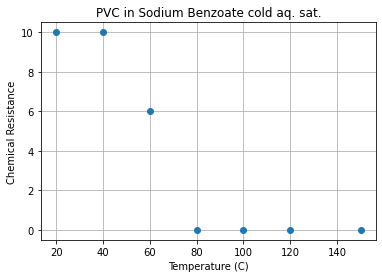

In [16]:
temp = df['Temperature (C)']
res = df['Resistance']

plt.plot(temp, res, '.', markersize = 12)
plt.grid()
plt.title('PVC in Sodium Benzoate cold aq. sat.')
plt.xlabel('Temperature (C)')
plt.ylabel('Chemical Resistance')
plt.show()


In [ ]:
df = df.sort_values('Temperature', axis = 0, ascending = False)
df

In [ ]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))

for i, x in np.ndenumerate(df["Concentration"]):
    for j, y in np.ndenumerate(df["Temperature"]):
        mat[j, i] = mapping.get((x, y), 0)

        
print(mat)

In [ ]:
conc = df.Concentration
temp = df.Temperature

levels = np.linspace(0, 10)
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
img = plt.contourf(mat, extent = [0, max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')
plt.xlabel('Concentration (vol%)')
plt.ylabel('Temperature (C)')
plt.show()

In [ ]:
"""
import pylab 

%matplotlib notebook

img = pylab.pcolor(mat, cmap = 'RdYlGn', vmin = 0, vmax = 10)
#img = pylab.pcolormesh(mat, cmap = 'RdYlGn', vmin = 0, vmax = 10)

pylab.grid()
pylab.colorbar(img, label = 'Chemical Resistance')
pylab.xlabel('Concentration (vol%)')
pylab.ylabel('Temperature (C)')

"""